In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data.csv")
df.shape

(120, 14)

In [3]:
df = df.drop(df.columns[[0, 1, 2, 13]], axis=1)

In [4]:
df.columns = ["major", "year", "freq", "doc_type", "know_latex", "level", "difficulties", "study_type", "result", "feedback"]

In [5]:
df

,major,year,freq,doc_type,know_latex,level,difficulties,study_type,result,feedback
0,An Toàn Thông Tin,2,3,"Báo cáo lab, Bài tập lớn, Luận văn",Mình chưa từng nghe đến LaTeX,1,Cảm thấy Word tiện hơn trong một số trường hợp,"Tớ muốn có Video ngắn (5-10 phút), Tớ muốn có ...",Nâng cao khả năng tự học và khám phá công cụ h...,"Có, mình rất sẵn sàng tham gia"
1,An Toàn Thông Tin,2,4,"Báo cáo lab, Khác",Mình đã thử dùng nhưng còn hạn chế,1,Mất nhiều thời gian để học cách sử dụng cơ bản...,"Tớ muốn có File hướng dẫn PDF ngắn gọn, Tớ muố...","Biết soạn thảo và trình bày tài liệu học tập, ...","Có, mình rất sẵn sàng tham gia"
2,An Toàn Thông Tin,2,2,"Báo cáo lab, Bài tập lớn",Mình có nghe qua nhưng chưa từng sử dụng,1,"Cú pháp khó nhớ hoặc dễ nhầm lẫn, Mất nhiều th...","Tớ muốn có Video ngắn (5-10 phút), Tớ muốn có ...","Biết soạn thảo và trình bày tài liệu học tập, ...","Có thể, nếu thời gian phù hợp"
3,An Toàn Thông Tin,2,2,Báo cáo lab,Mình chưa từng nghe đến LaTeX,1,Khác,Khác,"Biết soạn thảo và trình bày tài liệu học tập, ...","Không, mình không có ý định tham gia"
4,An Toàn Thông Tin,2,3,Báo cáo lab,Mình có nghe qua nhưng chưa từng sử dụng,2,"Giao diện hơi phức tạp, khó làm quen ban đầu, ...","Tớ muốn có File hướng dẫn PDF ngắn gọn, Tớ muố...","Biết soạn thảo và trình bày tài liệu học tập, ...","Có, mình rất sẵn sàng tham gia"
...,...,...,...,...,...,...,...,...,...,...
115,Thương Mại Điện Tử,2,5,"Báo cáo lab, Luận văn, Khác",Mình sử dụng thường xuyên và khá thành thạo,4,"Thiếu template phù hợp cho nhu cầu học tập, Mấ...","Tớ muốn có Video ngắn (5-10 phút), Tớ muốn có ...","Cải thiện kỹ năng trình bày, báo cáo và giao t...","Có, mình rất sẵn sàng tham gia"
116,Thương Mại Điện Tử,2,4,"Báo cáo lab, Bài tập lớn, Khác",Mình đã thử dùng nhưng còn hạn chế,2,"Giao diện hơi phức tạp, khó làm quen ban đầu, ...","Tớ muốn có File hướng dẫn PDF ngắn gọn, Tớ muố...","Biết soạn thảo và trình bày tài liệu học tập, ...","Có thể, nếu thời gian phù hợp"
117,Thương Mại Điện Tử,1,1,Khác,Mình có nghe qua nhưng chưa từng sử dụng,1,Khác,Tớ muốn có workshop thực hành (60-90 phút),"Biết soạn thảo và trình bày tài liệu học tập, ...","Chưa chắc, cần xem thêm nội dung cụ thể"
118,Trí Tuệ Nhân Tạo,1,3,Báo cáo lab,Mình chưa từng nghe đến LaTeX,1,"Cú pháp khó nhớ hoặc dễ nhầm lẫn, Lỗi compile ...","Tớ muốn có File hướng dẫn PDF ngắn gọn, Tớ muố...","Biết soạn thảo và trình bày tài liệu học tập, ...","Có, mình rất sẵn sàng tham gia"


# 1. Vẽ biểu đồ phân bố ngành học

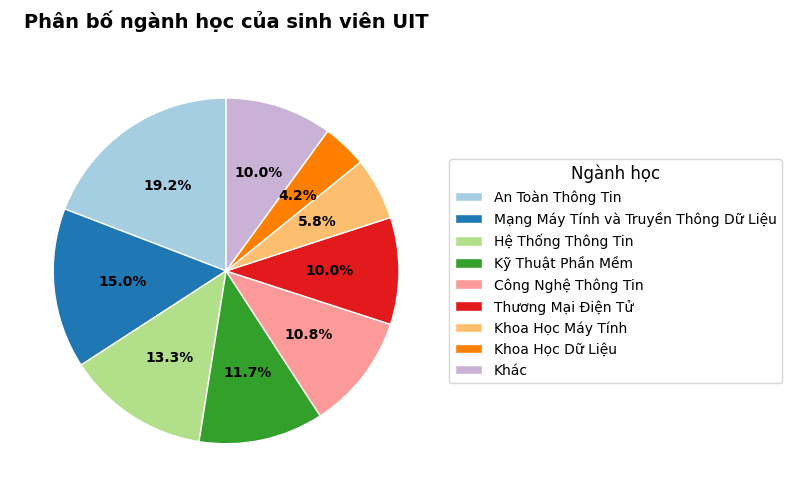

In [6]:
major_counts = df['major'].value_counts()

threshold = 5
majors_to_keep = major_counts[major_counts >= threshold]
majors_to_other = major_counts[major_counts < threshold]

major_counts_grouped = majors_to_keep.copy()
if len(majors_to_other) > 0:
    major_counts_grouped['Khác'] = majors_to_other.sum()

plt.figure(figsize=(8, 8))
colors = plt.cm.Paired.colors

wedges, texts, autotexts = plt.pie(
    major_counts_grouped,
    labels=None,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors[:len(major_counts_grouped)],
    wedgeprops={'edgecolor': 'white'}
)

for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(10)
    autotext.set_weight('bold')

labels_with_counts = [
    f"{label}" for label, count in zip(major_counts_grouped.index, major_counts_grouped.values)
]
plt.legend(
    wedges, labels_with_counts,
    title="Ngành học",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=10,
    title_fontsize=12
)

plt.title('Phân bố ngành học của sinh viên UIT', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

> **Nhận xét:**
Mẫu khảo sát có sự đa dạng ngành học trong khối CNTT, nổi bật là các ngành:

- An toàn thông tin (19.2%),

- Mạng máy tính & Truyền thông dữ liệu (15%),

- Hệ thống thông tin (13.3%),

- Kỹ thuật phần mềm (11.7%).
> Sự phân bố này phản ánh tính bao quát của khảo sát, hướng tới các nhóm sinh viên thường xuyên phải soạn thảo báo cáo kỹ thuật, bài tập lớn và tài liệu chuyên ngành.

# 2. Vẽ biểu đồ phân bố năm học

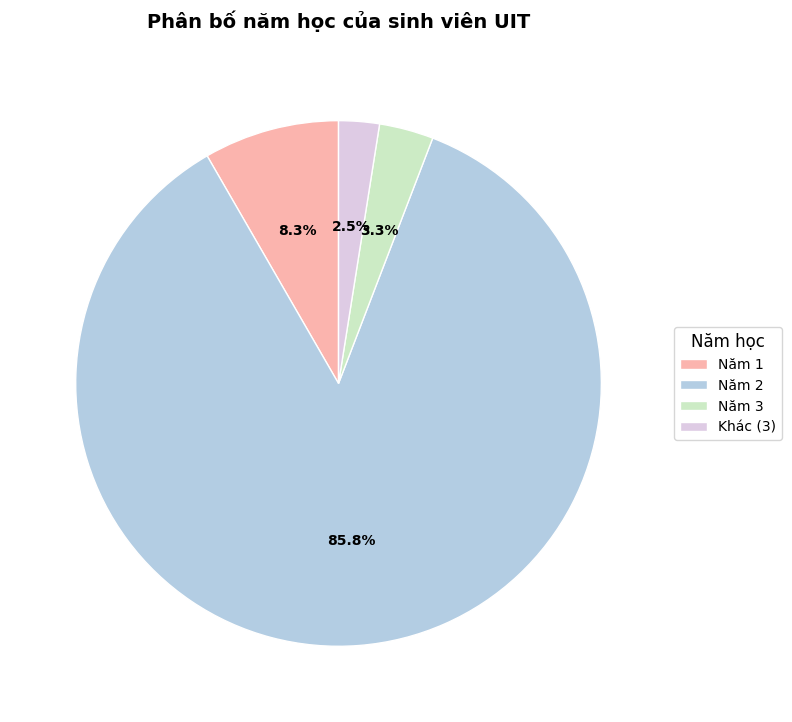

In [7]:
year_counts = df['year'].value_counts().sort_index()

threshold = 4
years_to_keep = year_counts[year_counts >= threshold]
years_to_other = year_counts[year_counts < threshold]

year_counts_grouped = years_to_keep.copy()
if len(years_to_other) > 0:
    year_counts_grouped['Khác'] = years_to_other.sum()

plt.figure(figsize=(8, 8))
colors = plt.cm.Pastel1.colors

wedges, texts, autotexts = plt.pie(
    year_counts_grouped,
    labels=None,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors[:len(year_counts_grouped)],
    wedgeprops={'edgecolor': 'white'}
)

for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(10)
    autotext.set_weight('bold')

labels_with_counts = [
    f"Năm {label}" if label != 'Khác' else f"{label} ({count})"
    for label, count in zip(year_counts_grouped.index, year_counts_grouped.values)
]

plt.legend(
    wedges,
    labels_with_counts,
    title="Năm học",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=10,
    title_fontsize=12
)

plt.title('Phân bố năm học của sinh viên UIT', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

> **Nhận xét:**
- Phần lớn người tham gia khảo sát là sinh viên năm 2 (chiếm 85.8%), trong khi sinh viên năm 1 chiếm 8.3% và các năm còn lại chỉ khoảng 5%.
- Điều này cho thấy mẫu khảo sát chủ yếu tập trung ở nhóm sinh viên đã có trải
nghiệm học tập thực hành cơ bản, bắt đầu làm quen với việc viết báo cáo và tài liệu — đối tượng phù hợp nhất để giới thiệu và áp dụng LaTeX.

# 3. Vẽ biểu đồ mức độ soạn thảo văn bản

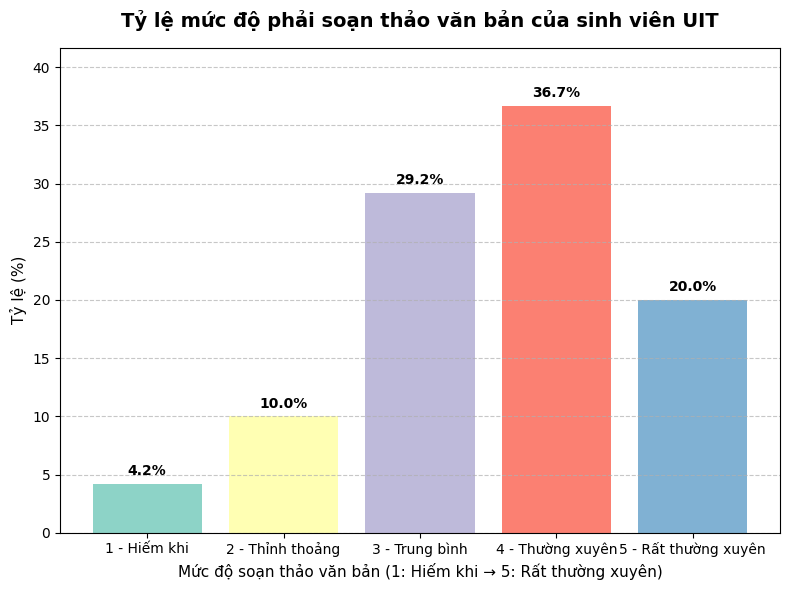

In [8]:
freq_counts = df['freq'].value_counts().sort_index()

threshold = 5
freq_to_keep = freq_counts[freq_counts >= threshold]
freq_to_other = freq_counts[freq_counts < threshold]

freq_counts_grouped = freq_to_keep.copy()
if len(freq_to_other) > 0:
    freq_counts_grouped['Khác'] = freq_to_other.sum()

freq_percent = freq_counts_grouped / freq_counts_grouped.sum() * 100

freq_labels = {
    1: "1 - Hiếm khi",
    2: "2 - Thỉnh thoảng",
    3: "3 - Trung bình",
    4: "4 - Thường xuyên",
    5: "5 - Rất thường xuyên",
    'Khác': "Khác"
}
x_labels = [freq_labels[i] for i in freq_counts_grouped.index]

plt.figure(figsize=(8, 6))
bars = plt.bar(x_labels, freq_percent, color=plt.cm.Set3.colors)

for bar, value in zip(bars, freq_percent):
    plt.text(bar.get_x() + bar.get_width()/2, value + 0.5,
             f'{value:.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title('Tỷ lệ mức độ phải soạn thảo văn bản của sinh viên UIT',
          fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Mức độ soạn thảo văn bản (1: Hiếm khi → 5: Rất thường xuyên)', fontsize=11)
plt.ylabel('Tỷ lệ (%)', fontsize=11)
plt.ylim(0, freq_percent.max() + 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

> Nhận xét:
Khoảng 85.9% sinh viên cho biết họ phải soạn thảo văn bản thường xuyên hoặc rất thường xuyên, trong đó mức 4 và 5 chiếm tới hơn 56%.
Điều này chứng tỏ việc viết báo cáo, tài liệu học tập là hoạt động quen thuộc và có tần suất cao, tạo cơ sở vững chắc cho việc áp dụng công cụ hỗ trợ soạn thảo chuyên nghiệp như LaTeX.

# 4. Vẽ biểu đồ các loại văn bản

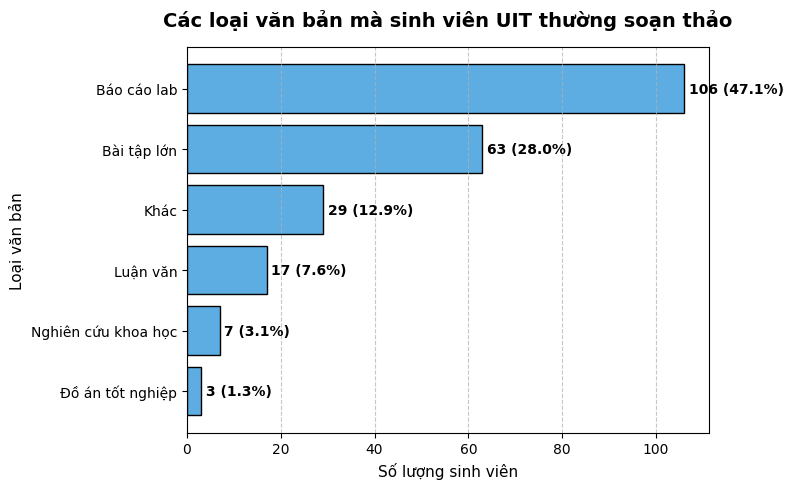

In [9]:
df_exploded = df.assign(doc_type=df['doc_type'].str.split(',')).explode('doc_type')
df_exploded['doc_type'] = df_exploded['doc_type'].str.strip()

doc_counts = df_exploded['doc_type'].value_counts()

threshold = 3
docs_to_keep = doc_counts[doc_counts >= threshold]
docs_to_other = doc_counts[doc_counts < threshold]

doc_counts_grouped = docs_to_keep.copy()
if len(docs_to_other) > 0:
    doc_counts_grouped['Khác'] = docs_to_other.sum()

total = doc_counts_grouped.sum()
doc_percent = doc_counts_grouped / total * 100

plt.figure(figsize=(8, 5))
bars = plt.barh(doc_counts_grouped.index, doc_counts_grouped.values,
                color='#5DADE2', edgecolor='black')

for i, (count, pct) in enumerate(zip(doc_counts_grouped.values, doc_percent)):
    plt.text(count + 1, i, f"{count} ({pct:.1f}%)",
             va='center', fontsize=10, fontweight='bold')

plt.gca().invert_yaxis()
plt.title('Các loại văn bản mà sinh viên UIT thường soạn thảo',
          fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Số lượng sinh viên', fontsize=11)
plt.ylabel('Loại văn bản', fontsize=11)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

> *Nhận xét:*
Các loại tài liệu phổ biến nhất gồm:

- Báo cáo lab (47.1%) và

- Bài tập lớn (28.0%).
> Những loại văn bản đòi hỏi cấu trúc trình bày và trích dẫn khoa học rõ ràng, vốn là thế mạnh của LaTeX.
Các thể loại khác như luận văn, nghiên cứu khoa học hay đồ án tốt nghiệp xuất hiện ít hơn nhưng vẫn là những ứng dụng tiềm năng của LaTeX ở giai đoạn học tập sau này.

# 5. Vẽ biểu đồ biểu thị mức độ nhận biết LaTeX

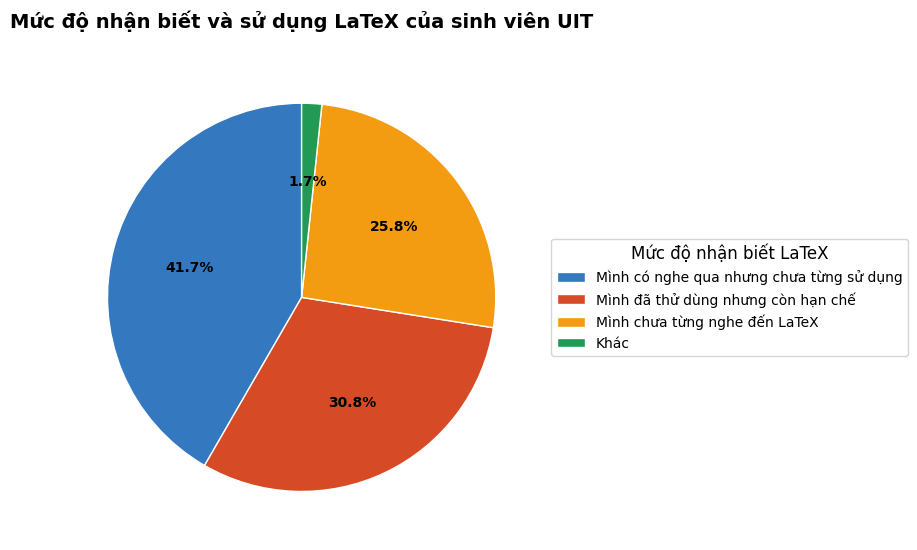

In [10]:
know_counts = df['know_latex'].value_counts()

threshold = 5
know_to_keep = know_counts[know_counts >= threshold]
know_to_other = know_counts[know_counts < threshold]

know_counts_grouped = know_to_keep.copy()
if len(know_to_other) > 0:
    know_counts_grouped['Khác'] = know_to_other.sum()

plt.figure(figsize=(8, 6))
colors = ['#3478BF', '#D64B26', '#F39C12', '#229954', '#7F8C8D']

wedges, texts, autotexts = plt.pie(
    know_counts_grouped,
    labels=None,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors[:len(know_counts_grouped)],
    wedgeprops={'edgecolor': 'white'}
)

for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(10)
    autotext.set_weight('bold')

labels_with_counts = [
    f"{label}" for label in know_counts_grouped.index
]

plt.legend(
    wedges,
    labels_with_counts,
    title="Mức độ nhận biết LaTeX",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=10,
    title_fontsize=12
)

plt.title('Mức độ nhận biết và sử dụng LaTeX của sinh viên UIT',
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

> Nhận xét:
Khoảng 41.7% sinh viên chỉ mới nghe qua nhưng chưa từng sử dụng, trong khi 30.8% đã thử dùng nhưng còn hạn chế, và 25.8% hoàn toàn chưa biết đến LaTeX.
Điều này phản ánh rằng LaTeX vẫn còn khá xa lạ với phần lớn sinh viên UIT, song cũng cho thấy tiềm năng mở rộng rất lớn, đặc biệt ở nhóm đã từng nghe hoặc thử qua công cụ này.

# 6. Vẽ biểu đồ mức độ thành thạo LaTeX

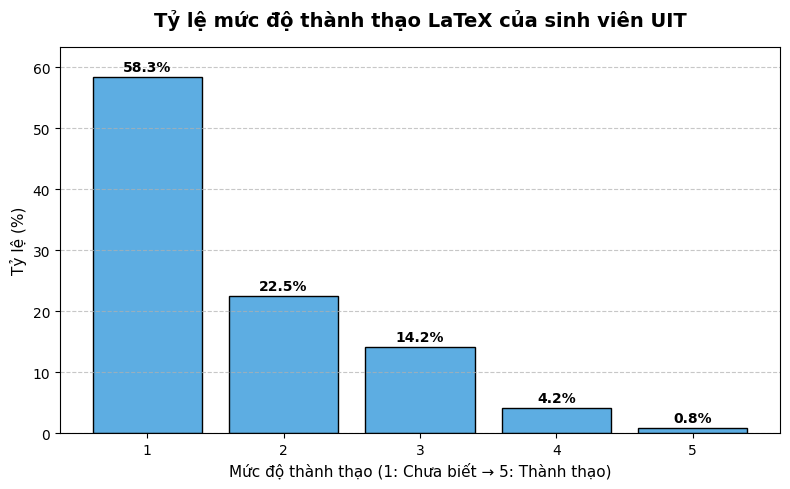

In [11]:
level_counts = df['level'].value_counts().sort_index()

level_percent = level_counts / level_counts.sum() * 100

plt.figure(figsize=(8, 5))
bars = plt.bar(level_counts.index.astype(str),
               level_percent,
               color='#5DADE2',
               edgecolor='black')

for bar, value in zip(bars, level_percent):
    plt.text(bar.get_x() + bar.get_width()/2,
             value + 0.5,
             f"{value:.1f}%",
             ha='center', va='bottom',
             fontsize=10, fontweight='bold', color='black')

plt.title('Tỷ lệ mức độ thành thạo LaTeX của sinh viên UIT',
          fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Mức độ thành thạo (1: Chưa biết → 5: Thành thạo)', fontsize=11)
plt.ylabel('Tỷ lệ (%)', fontsize=11)
plt.ylim(0, level_percent.max() + 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

> Nhận xét:
Mức thành thạo còn thấp: 58.3% sinh viên tự đánh giá bản thân “chưa biết”, chỉ 0.8% cho rằng mình “thành thạo”.
Kết quả này phù hợp với mức độ nhận biết ở trên, đồng thời nhấn mạnh nhu cầu cấp thiết về một tài liệu hướng dẫn dễ hiểu, thực tiễn và thân thiện với người mới bắt đầu.

# 7. Vẽ biểu đồ phân bố các khó khăn

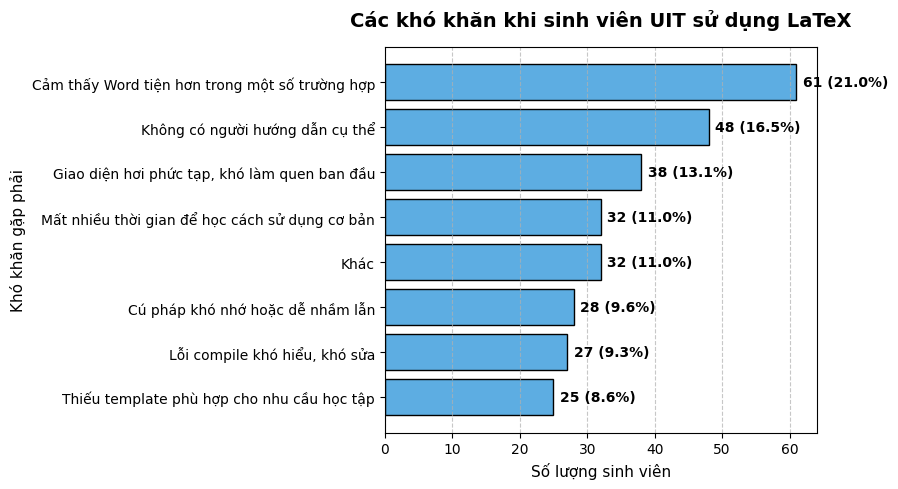

In [12]:
import re
df_exploded = df.assign(
    difficulties=df['difficulties'].apply(
        lambda x: re.split(r', (?=[A-ZÀ-Ỹ])', x) if isinstance(x, str) else x
    )
).explode('difficulties')

df_exploded['difficulties'] = df_exploded['difficulties'].str.strip()

diff_counts = df_exploded['difficulties'].value_counts()

threshold = 5
diff_to_keep = diff_counts[diff_counts >= threshold]
diff_to_other = diff_counts[diff_counts < threshold]

diff_counts_grouped = diff_to_keep.copy()
if len(diff_to_other) > 0:
    diff_counts_grouped['Khác'] = diff_to_other.sum()

total = diff_counts_grouped.sum()
diff_percent = diff_counts_grouped / total * 100

plt.figure(figsize=(9, 5))
bars = plt.barh(diff_counts_grouped.index,
                diff_counts_grouped.values,
                color='#5DADE2', edgecolor='black')

for i, (count, pct) in enumerate(zip(diff_counts_grouped.values, diff_percent)):
    plt.text(count + 1, i, f"{count} ({pct:.1f}%)",
             va='center', fontsize=10, fontweight='bold')

plt.gca().invert_yaxis()
plt.title('Các khó khăn khi sinh viên UIT sử dụng LaTeX',
          fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Số lượng sinh viên', fontsize=11)
plt.ylabel('Khó khăn gặp phải', fontsize=11)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

> Nhận xét:
Ba nhóm khó khăn hàng đầu gồm:

- Cảm thấy Word tiện hơn trong một số trường hợp (21%),

- Thiếu người hướng dẫn cụ thể (16.5%),

- Giao diện phức tạp, khó làm quen ban đầu (13.1%).
> Điều này cho thấy rào cản chính không nằm ở khả năng học, mà ở trải nghiệm ban đầu và thiếu tài liệu phù hợp.
Nếu được hỗ trợ đúng cách, sinh viên hoàn toàn có thể vượt qua và khai thác sức mạnh của LaTeX.

# 8. Vẽ biểu đồ biểu thị hình thức học được yêu thích

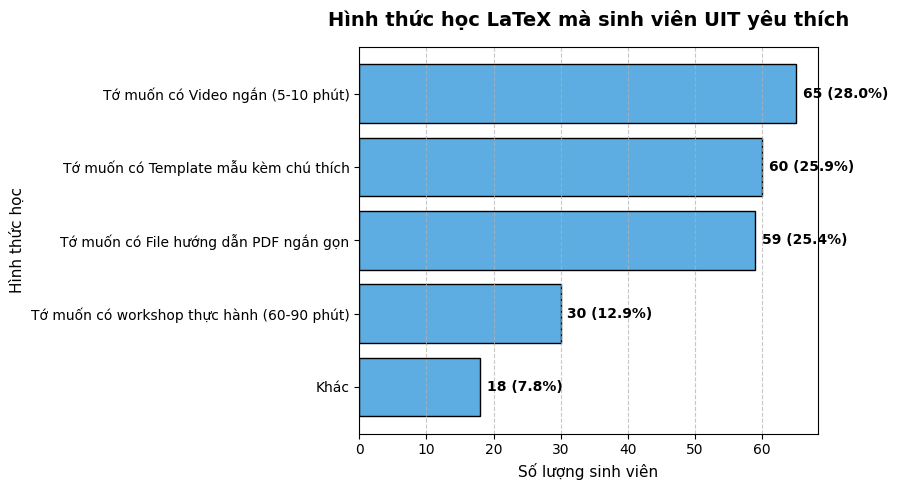

In [13]:
pattern = re.compile(r',\s+(?=[A-ZÀ-Ỹ])')

def split_choices(x):
    if isinstance(x, str):
        parts = pattern.split(x)
        return [p.strip() for p in parts if p.strip()]
    return x

df_exploded = df.assign(study_type=df['study_type'].apply(split_choices)).explode('study_type')

df_exploded['study_type'] = df_exploded['study_type'].astype(str).str.strip()

study_counts = df_exploded['study_type'].value_counts()

threshold = 5
keep = study_counts[study_counts >= threshold]
other = study_counts[study_counts < threshold]

study_counts_grouped = keep.copy()
if len(other) > 0:
    study_counts_grouped['Khác'] = other.sum()

total = study_counts_grouped.sum()
study_percent = study_counts_grouped / total * 100

study_counts_grouped = study_counts_grouped.sort_values(ascending=False)
study_percent = study_percent.loc[study_counts_grouped.index]

plt.figure(figsize=(9, 5))
bars = plt.barh(study_counts_grouped.index,
                study_counts_grouped.values,
                color='#5DADE2', edgecolor='black')

for i, (count, pct) in enumerate(zip(study_counts_grouped.values, study_percent.values)):
    plt.text(count + 1, i, f"{count} ({pct:.1f}%)",
             va='center', fontsize=10, fontweight='bold')

plt.gca().invert_yaxis()
plt.title('Hình thức học LaTeX mà sinh viên UIT yêu thích',
          fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Số lượng sinh viên', fontsize=11)
plt.ylabel('Hình thức học', fontsize=11)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

> Nhận xét:
Các hình thức được yêu thích nhất là:

- Video ngắn 5–10 phút (28.0%),

- Template mẫu có chú thích (25.9%),

- File hướng dẫn PDF ngắn gọn (25.4%).
> Kết quả này chỉ ra rằng sinh viên ưu tiên hình thức học trực quan, ngắn gọn, dễ áp dụng, hơn là workshop dài hoặc lý thuyết thuần túy — một hướng triển khai khả thi cho nhóm bạn.

# 9. Vẽ biểu đồ kết quả mong muốn sau khi học

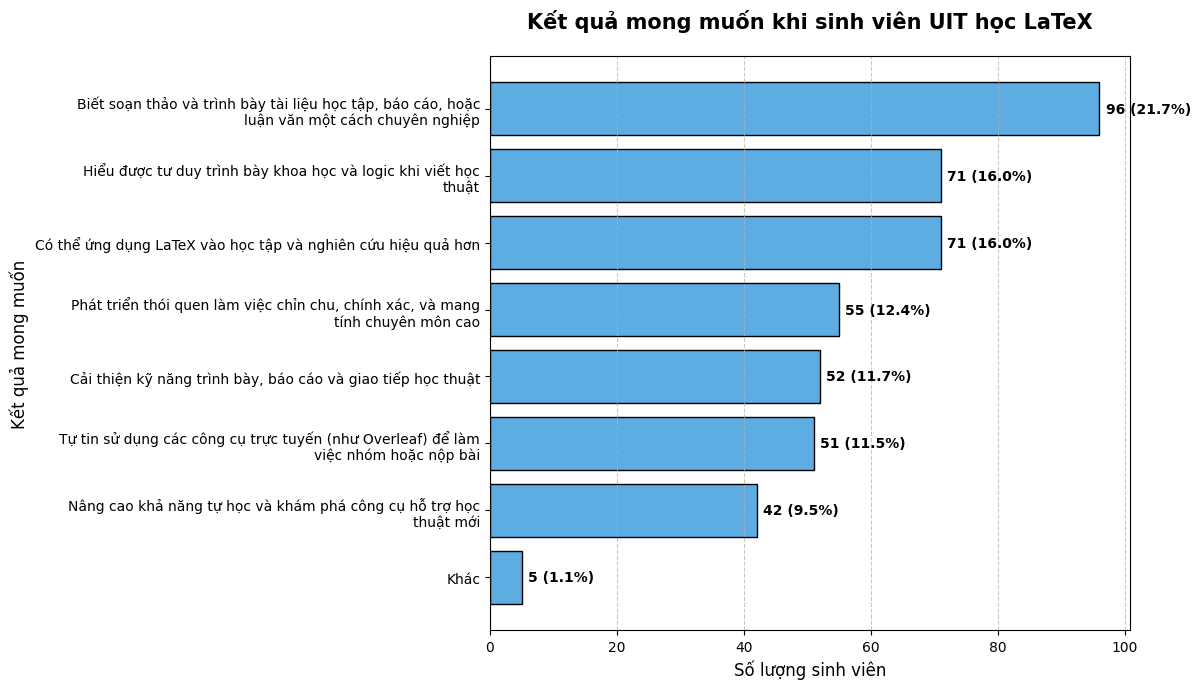

In [14]:
import textwrap
pattern = re.compile(r',\s+(?=[A-ZÀ-Ỹ])')

def split_choices(x):
    if isinstance(x, str):
        parts = pattern.split(x)
        return [p.strip() for p in parts if p.strip()]
    return x

df_exploded = df.assign(result=df['result'].apply(split_choices)).explode('result')

df_exploded['result'] = df_exploded['result'].astype(str).str.strip()

result_counts = df_exploded['result'].value_counts()

threshold = 5
keep = result_counts[result_counts >= threshold]
other = result_counts[result_counts < threshold]
result_counts_grouped = keep.copy()
if len(other) > 0:
    result_counts_grouped['Khác'] = other.sum()

total = result_counts_grouped.sum()
result_percent = result_counts_grouped / total * 100

result_counts_grouped = result_counts_grouped.sort_values(ascending=False)
result_percent = result_percent.loc[result_counts_grouped.index]

wrapped_labels = [
    "\n".join(textwrap.wrap(label, width=60))
    for label in result_counts_grouped.index
]

plt.figure(figsize=(12, 7))
bars = plt.barh(wrapped_labels,
                result_counts_grouped.values,
                color='#5DADE2', edgecolor='black')

for i, (count, pct) in enumerate(zip(result_counts_grouped.values, result_percent.values)):
    plt.text(count + 1, i, f"{count} ({pct:.1f}%)",
             va='center', fontsize=10, fontweight='bold')

plt.gca().invert_yaxis()
plt.title('Kết quả mong muốn khi sinh viên UIT học LaTeX',
          fontsize=15, fontweight='bold', pad=20)
plt.xlabel('Số lượng sinh viên', fontsize=12)
plt.ylabel('Kết quả mong muốn', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

> Nhận xét:
Mục tiêu nổi bật là:

- Biết soạn thảo và trình bày tài liệu học tập một cách chuyên nghiệp (21.7%),

- Hiểu được tư duy khoa học, logic khi viết học thuật (16%),

- Ứng dụng LaTeX hiệu quả vào học tập và nghiên cứu (16%).
> Điều này cho thấy sinh viên coi LaTeX không chỉ là công cụ, mà là cách tiếp cận học thuật mới, giúp nâng cao chất lượng bài làm và tư duy trình bày.

# 10. Mức độ hứng thú với dự án post-survey

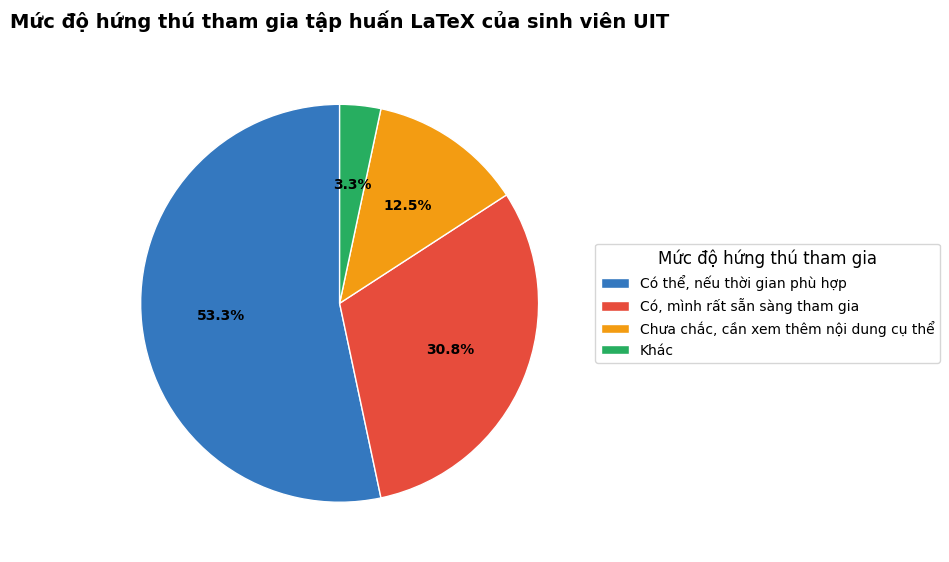

In [15]:
feedback_counts = df['feedback'].value_counts()

threshold = 5
keep = feedback_counts[feedback_counts >= threshold]
other = feedback_counts[feedback_counts < threshold]

feedback_counts_grouped = keep.copy()
if len(other) > 0:
    feedback_counts_grouped['Khác'] = other.sum()

plt.figure(figsize=(8, 6))
colors = ['#3478BF', '#E74C3C', '#F39C12', '#27AE60', '#95A5A6']

wedges, texts, autotexts = plt.pie(
    feedback_counts_grouped,
    labels=None,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors[:len(feedback_counts_grouped)],
    wedgeprops={'edgecolor': 'white'}
)

for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(10)
    autotext.set_weight('bold')

labels_with_counts = [
    f"{label}"
    for label, count in zip(feedback_counts_grouped.index, feedback_counts_grouped.values)
]

plt.legend(
    wedges,
    labels_with_counts,
    title="Mức độ hứng thú tham gia",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=10,
    title_fontsize=12
)

plt.title('Mức độ hứng thú tham gia tập huấn LaTeX của sinh viên UIT',
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

> Nhận xét:
Hơn 84% sinh viên bày tỏ sẵn sàng hoặc có thể tham gia nếu thời gian phù hợp, trong đó 53.3% nói “có thể, nếu thời gian phù hợp” và 30.8% “rất sẵn sàng”.
Đây là chỉ báo tích cực, cho thấy sinh viên UIT có nhu cầu thực sự và sẵn sàng tham gia hoạt động học tập thực hành về LaTeX, miễn là hình thức triển khai phù hợp với lịch trình học tập.

# Phân tích kết quả khảo sát và định hướng phát triển sản phẩm
1. Tổng quan mẫu khảo sát

Cuộc khảo sát thu hút 120 sinh viên UIT tham gia, chủ yếu thuộc năm 2 (chiếm 85.8%) và đến từ nhiều ngành khác nhau trong khối công nghệ thông tin, như An toàn thông tin, Mạng máy tính, Hệ thống thông tin và Kỹ thuật phần mềm.
Nhìn chung, mẫu khảo sát có tính đại diện cao cho nhóm sinh viên kỹ thuật đang trong giai đoạn bắt đầu thực hiện các môn học cần báo cáo, bài tập lớn, hoặc đồ án — đây cũng là đối tượng mục tiêu lý tưởng của tài liệu hướng dẫn LaTeX mà nhóm hướng tới.

2. Thói quen và nhu cầu soạn thảo văn bản

Phần lớn sinh viên cho biết họ thường xuyên phải soạn thảo văn bản học tập như báo cáo lab (47.1%) và bài tập lớn (28.0%).
Khoảng 85% sinh viên đánh giá mức độ soạn thảo ở mức thường xuyên hoặc rất thường xuyên, cho thấy việc viết và trình bày tài liệu học tập là hoạt động phổ biến, gắn liền với quá trình học tại UIT.

> Tuy nhiên, đa số sinh viên hiện vẫn sử dụng Word như công cụ chính, do tính tiện lợi và quen thuộc. Chính vì vậy, họ ít khi có cơ hội tiếp cận những công cụ học thuật chuyên nghiệp hơn như LaTeX.

3. Nhận thức và mức độ thành thạo LaTeX

Kết quả khảo sát cho thấy:

- 41.7% sinh viên chỉ mới nghe qua nhưng chưa từng sử dụng,

- 30.8% đã thử dùng nhưng còn hạn chế,

- và 25.8% hoàn toàn chưa biết đến LaTeX.

> Đáng chú ý, gần 60% sinh viên tự đánh giá mình “chưa biết sử dụng”, chỉ có dưới 1% cảm thấy thành thạo.
Điều này phản ánh một khoảng trống kỹ năng đáng kể giữa nhu cầu viết học thuật và khả năng sử dụng công cụ chuyên nghiệp của sinh viên UIT.

4. Khó khăn khi tiếp cận LaTeX

Những trở ngại phổ biến nhất mà sinh viên gặp phải bao gồm:

- Cảm thấy Word tiện hơn trong một số trường hợp (21%),

- Thiếu người hướng dẫn cụ thể (16.5%),

- Giao diện phức tạp, khó làm quen ban đầu (13.1%).

> Nhìn chung, các khó khăn này chủ yếu đến từ trải nghiệm ban đầu và thiếu tài liệu học tập thân thiện, chứ không phải do bản thân LaTeX khó học.
Điều này cho thấy nếu có tài liệu hướng dẫn được thiết kế rõ ràng, ngắn gọn và thực hành trực quan, sinh viên hoàn toàn có thể vượt qua giai đoạn khởi đầu này.

5. Hình thức học tập và nhu cầu hỗ trợ

Khi được hỏi về hình thức học LaTeX mong muốn, sinh viên bày tỏ sự yêu thích đối với:

- Video ngắn 5–10 phút (28%),

- Template mẫu có chú thích (25.9%),

- File hướng dẫn PDF ngắn gọn (25.4%).

> Kết quả này cho thấy sinh viên ưu tiên hình thức học thực hành, ngắn gọn và trực quan, thay vì các workshop dài hoặc tài liệu thuần lý thuyết.
Đây là cơ sở định hướng trực tiếp cho nhóm trong quá trình phát triển sản phẩm hướng dẫn sử dụng LaTeX.

6. Kết quả mong muốn và động lực học LaTeX

Sinh viên mong muốn đạt được các kết quả sau khi học LaTeX:

- Soạn thảo và trình bày tài liệu học tập một cách chuyên nghiệp (21.7%),

- Hiểu tư duy khoa học và logic khi viết học thuật (16%),

- Ứng dụng LaTeX vào học tập và nghiên cứu hiệu quả hơn (16%).

> Ngoài ra, hơn 84% sinh viên bày tỏ sẵn sàng hoặc có thể tham gia tập huấn nếu thời gian phù hợp.
Điều này chứng tỏ LaTeX không chỉ là một công cụ mới, mà còn là một kỹ năng học thuật sinh viên UIT thực sự mong muốn được trang bị.

7. Tổng hợp và định hướng phát triển sản phẩm

Từ kết quả khảo sát, có thể rút ra một số định hướng tổng quát cho đồ án:

## Đối tượng chính

Sinh viên năm 2–3 thuộc khối ngành CNTT, thường xuyên phải viết báo cáo, bài tập lớn, luận văn nhỏ.

Nhóm có nhu cầu cao nhưng chưa có nền tảng LaTeX vững chắc.

## Mục tiêu sản phẩm

Cung cấp tài liệu hướng dẫn sử dụng LaTeX dành cho sinh viên UIT, giúp người học:

- Làm quen nhanh với cú pháp cơ bản,

- Biết trình bày báo cáo, bài tập theo chuẩn học thuật,

- Có khả năng ứng dụng ngay vào môn học thực tế.

## Định hướng thiết kế nội dung

- Tài liệu dạng PDF hướng dẫn + Template mẫu được chú thích chi tiết.

- Video minh họa ngắn (5–10 phút) cho từng nội dung quan trọng (nếu có điều kiện triển khai).

- Ngôn ngữ trình bày thân thiện, súc tích, minh họa trực quan qua ví dụ thật tại UIT.

## Tác động kỳ vọng

- Góp phần nâng cao năng lực soạn thảo học thuật và tư duy trình bày khoa học cho sinh viên.

- Giúp sinh viên UIT tiếp cận sớm với các công cụ chuyên nghiệp, chuẩn bị tốt hơn cho học tập và nghiên cứu.

- Đặt nền móng cho các hoạt động chia sẻ, tập huấn hoặc cộng đồng học LaTeX trong trường.

8. Kết luận chung

> Kết quả khảo sát cho thấy sinh viên UIT ý thức rõ tầm quan trọng của việc trình bày học thuật, nhưng vẫn còn thiếu công cụ và hướng dẫn phù hợp.
Do đó, việc nhóm 10 thực hiện đề tài “Hướng dẫn sử dụng LaTeX cho sinh viên UIT” là hợp lý, cần thiết và có tính ứng dụng cao.
Sản phẩm không chỉ giúp người học rút ngắn thời gian làm quen với LaTeX mà còn góp phần xây dựng phong cách học tập chuyên nghiệp, khoa học và hiện đại hơn cho sinh viên trong toàn trường.